In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func

In [4]:
# create engine to hawaii.sqlite
database_path= '../SurfsUp/Resources/hawaii.sqlite'
engine = create_engine(f"sqlite:///{database_path}")


In [5]:
# reflect an existing database into a new model
Base= automap_base()


In [6]:

# reflect the tables
Base.prepare(autoload_with=engine)



In [7]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station


In [9]:
# Create our session (link) from Python to the DB
session = Session(bind=engine)

# Exploratory Precipitation Analysis

In [11]:
# Find the most recent date in the data set.
recent = session.query(Measurement.date).order_by(Measurement.date.desc()).first()


In [12]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
yearStart= dt.date(2017,8,23) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
data = session.query(Measurement.date,Measurement.prcp).\
    filter(Measurement.date > yearStart).all()


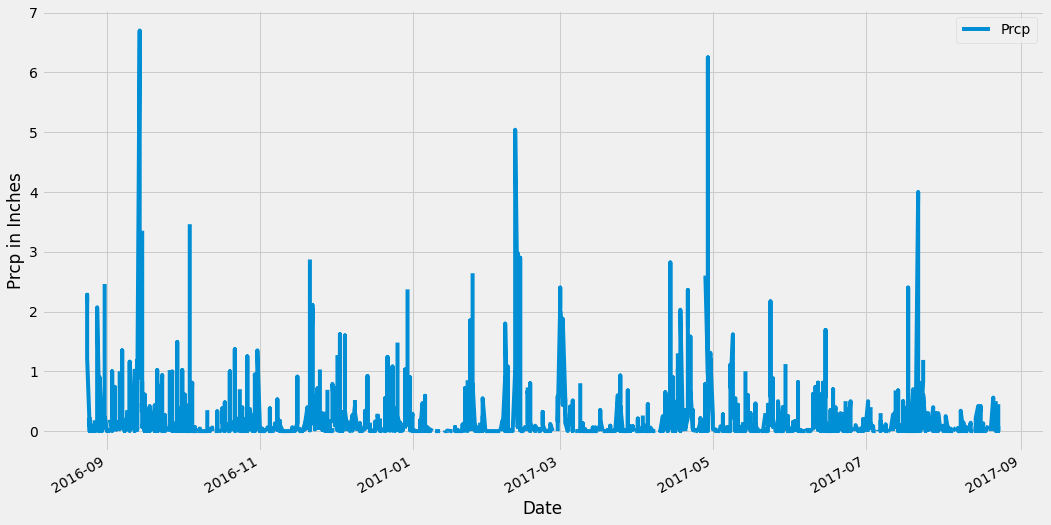

In [13]:

# # Save the query results as a Pandas DataFrame and set the index to the date column
df= pd.DataFrame(data,columns=['Date','Prcp'])
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date',inplace=True)

# Use Pandas Plotting with Matplotlib to plot the data
df.plot(figsize=(16,9))
plt.ylabel('Prcp in Inches')
plt.show()


In [14]:
# Use Pandas to calcualte the summary statistics for the precipitation data
meanPrcp = (df['Prcp'].mean())
medianPrcp= (df['Prcp'].median())
modePrcp = (df['Prcp'].mode())

print(meanPrcp)
print(medianPrcp)
print(modePrcp)

df.describe()

0.1764615384615388
0.02
0    0.0
Name: Prcp, dtype: float64


,Prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [15]:
# Design a query to calculate the total number stations in the dataset
session.query(Measurement.station).distinct().count()

9

In [16]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
session.execute("""select station,count(*) from measurement
 GROUP BY station
 ORDER BY count(*) DESC""").fetchall()


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [17]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
lowest= session.query(func.min(Measurement.tobs)).\
    filter(Measurement.station == 'USC00519281').first()

print(lowest)
highest= session.query(func.max(Measurement.tobs)).\
    filter(Measurement.station == 'USC00519281').first()
print(highest)
avg =  session.query(func.avg(Measurement.tobs)).\
    filter(Measurement.station == 'USC00519281').first()
print(avg)

(54.0,)
(85.0,)
(71.66378066378067,)


<function matplotlib.pyplot.show(close=None, block=None)>

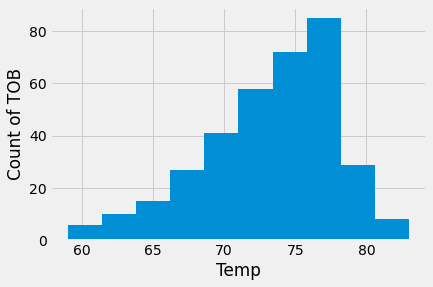

In [18]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
dataTOB = session.query(Measurement.date,Measurement.tobs).filter(Measurement.station == 'USC00519281',Measurement.date > yearStart).\
    order_by(Measurement.date)
dfTOB= pd.DataFrame(dataTOB,columns=['Date','TOB'])
dfTOB['Date'] = pd.to_datetime(dfTOB['Date'])
dfTOB.set_index('Date',inplace=True)

plt.hist(dfTOB)
plt.xlabel('Temp')
plt.ylabel('Count of TOB')
plt.show


# Close session

In [19]:
# Close Session
session.close()